In [1]:
using DataFrames
using CSV
using Plots
using Statistics
using ColorSchemes

In [2]:
# -- carga de Datos
df = CSV.read("bottle.csv", DataFrame);
# --- dataShape ---
println("Número de filas: $(nrow(df))")
println("Número de columnas: $(ncol(df))")

Número de filas: 864863
Número de columnas: 74


In [3]:
# --- dataType ---
println("\nTipos de datos de cada columna:")
for (name, type) in zip(names(df), eltype.(eachcol(df)))
    println("$name: $type")
end


Tipos de datos de cada columna:
Cst_Cnt: Int64
Btl_Cnt: Int64
Sta_ID: String15
Depth_ID: String
Depthm: Int64
T_degC: Union{Missing, Float64}
Salnty: Union{Missing, Float64}
O2ml_L: Union{Missing, Float64}
STheta: Union{Missing, Float64}
O2Sat: Union{Missing, Float64}
Oxy_µmol/Kg: Union{Missing, Float64}
BtlNum: Union{Missing, Int64}
RecInd: Int64
T_prec: Union{Missing, Int64}
T_qual: Union{Missing, Int64}
S_prec: Union{Missing, Int64}
S_qual: Union{Missing, Int64}
P_qual: Union{Missing, Int64}
O_qual: Union{Missing, Int64}
SThtaq: Union{Missing, Int64}
O2Satq: Union{Missing, Int64}
ChlorA: Union{Missing, Float64}
Chlqua: Union{Missing, Int64}
Phaeop: Union{Missing, Float64}
Phaqua: Union{Missing, Int64}
PO4uM: Union{Missing, Float64}
PO4q: Union{Missing, Int64}
SiO3uM: Union{Missing, Float64}
SiO3qu: Union{Missing, Int64}
NO2uM: Union{Missing, Float64}
NO2q: Union{Missing, Int64}
NO3uM: Union{Missing, Float64}
NO3q: Union{Missing, Int64}
NH3uM: Union{Missing, Float64}
NH3q: Union{Mis

In [4]:
# --- count_missing(col) ---
function count_missing(col::AbstractVector)
    return sum(ismissing.(col))
end

# --- dataMissingPercentage ---
function dataMissingPercentage(df::DataFrame)
    """Calcula el porcentaje de datos faltantes en cada columna del DataFrame.

    Args:
      df: El DataFrame a inspeccionar.

    Returns:
      Un diccionario donde las claves son los nombres de las columnas y los 
      valores son los porcentajes de datos faltantes.
    """
    missing_percentages = Dict{String, Float64}()
    for col_name in names(df)
        missing_count = count_missing(df[:, col_name])
        missing_percentages[col_name] = (missing_count / nrow(df)) * 100
    end
    return missing_percentages
end

# Imprimir el número de valores faltantes en cada columna
println("\nNúmero de valores faltantes en cada columna:")
for (col_name, missing_count) in dataMissingPercentage(df)
    println("$col_name: $missing_count %")
end


Número de valores faltantes en cada columna:
pH2: 99.99884374750683 %
SiO3uM: 59.058139844114045 %
LightP: 97.84347347498968 %
MeanAp: 97.63465427472327 %
Cst_Cnt: 0.0 %
TA2: 99.97294369165984 %
R_O2: 19.501585800294382 %
R_DYNHT: 5.394727257380649 %
TA1: 99.75903698042349 %
O2Satq: 74.81716757451758 %
DarkAs: 97.38120372822054 %
PO4q: 47.76213111209521 %
R_SVA: 6.101660031704443 %
NH3q: 6.540226602363611 %
R_NO3: 60.98676900272066 %
T_qual: 97.32593485904704 %
R_SALINITY: 5.475318056154559 %
O2ml_L: 19.501585800294382 %
S_prec: 5.475318056154559 %
STheta: 6.092178761260454 %
Phaqua: 26.095809394089002 %
Phaeop: 73.95298446112274 %
IncTim: 98.33071827561129 %
Sta_ID: 0.0 %
S_qual: 91.33805007267047 %
SiO3qu: 40.930991382450166 %
R_CHLA: 73.95240633487616 %
DIC1: 99.76886512661542 %
BtlNum: 86.27909853930622 %
DIC2: 99.97409994415301 %
R_POTEMP: 5.324195855297313 %
NO3q: 38.726364753724 %
C14A2q: 1.877754048907168 %
O_qual: 78.64679145714408 %
DarkAp: 97.63465427472327 %
R_O2Sat: 22.94

In [10]:
# --- deleteColumns(threshold) ---
function deleteColumns(df::DataFrame, threshold::Float64)
    """Elimina las columnas del DataFrame que tienen un porcentaje de datos faltantes 
       mayor o igual que el umbral dado.

    Args:
      df: El DataFrame a modificar.
      threshold: El umbral de porcentaje de datos faltantes.

    Returns:
      El DataFrame con las columnas eliminadas.
    """
    cols_to_delete = [col_name for (col_name, missing_percent) in dataMissingPercentage(df) if missing_percent > threshold]
    select!(df, Not(cols_to_delete))
end

# Eliminar columnas con más del 50% de valores faltantes
deleteColumns(df, 50.0);  # Pasa el DataFrame 'df' como argumento

447014×36 DataFrame
    Row │ Cst_Cnt  Btl_Cnt  Sta_ID       Depth_ID                           De ⋯
        │ Int64    Int64    String15     String                             In ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │       1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
      2 │       1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      3 │       1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      4 │       1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      5 │       1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
      6 │       1        6  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      7 │       1        7  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      8 │       1        8  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      9 │       1        9  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
     10 │       1       10  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
     11 │       1       11  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
   ⋮    │    ⋮        ⋮          ⋮                       ⋮                     ⋱
 447005 │   34393   864509  093.3 040.0  20-1611SR-MX-311-1551-09330400-0…
 447006 │   34394   864543  093.3 045.0  20-1611SR-PR-311-2046-09330450-0…     ⋯
 447007 │   34394   864544  093.3 045.0  20-1611SR-PR-311-2046-09330450-0…
 447008 │   34394   864550  093.3 045.0  20-1611SR-PR-311-2046-09330450-0…
 447009 │   34396   864608  093.3 055.0  20-1611SR-MX-312-0455-09330550-0…
 447010 │   34396   864623  093.3 055.0  20-1611SR-MX-312-0455-09330550-0…     ⋯
 447011 │   34396   864625  093.3 055.0  20-1611SR-MX-312-0455-09330550-0…
 447012 │   34398   864672  093.3 070.0  20-1611SR-PR-312-1629-09330700-0…
 447013 │   34398   864679  093.3 070.0  20-1611SR-PR-312-1629-09330700-0…
 447014 │   34401   864777  093.3 100.0  20-1611SR-MX-313-0851-09331000-0…     ⋯
                                              32 columns and 446993 rows omitted

In [24]:
# Imprimir el número de valores faltantes en cada columna
println("\nNúmero de valores faltantes en cada columna:")
for (col_name, missing_count) in dataMissingPercentage(df)
    println("$col_name: $missing_count %")
end


Número de valores faltantes en cada columna:
C14A2q: 0.0 %
NO2q: 0.0 %
PO4q: 0.0 %
R_SVA: 0.0 %
NH3q: 0.0 %
Cst_Cnt: 0.0 %
R_O2Sat: 0.0 %
R_SALINITY: 0.0 %
O2ml_L: 0.0 %
S_prec: 0.0 %
STheta: 0.0 %
P_qual: 0.0 %
RecInd: 0.0 %
Phaqua: 0.0 %
R_TEMP: 0.0 %
R_O2: 0.0 %
Sta_ID: 0.0 %
T_degC: 0.0 %
R_Depth: 0.0 %
SiO3qu: 0.0 %
Chlqua: 0.0 %
Depthm: 0.0 %
C14A1q: 0.0 %
O2Sat: 0.0 %
Btl_Cnt: 0.0 %
R_DYNHT: 0.0 %
R_PRES: 0.0 %
Oxy_µmol/Kg: 0.0 %
Salnty: 0.0 %
T_prec: 0.0 %
Depth_ID: 0.0 %
DarkAq: 0.0 %
R_POTEMP: 0.0 %
NO3q: 0.0 %
MeanAq: 0.0 %
R_SIGMA: 0.0 %


In [16]:
# --- deleteRow(column) ---
function deleteRow(df::DataFrame, column::Symbol)
    """Elimina todas las filas del DataFrame que tienen un valor faltante en la columna especificada.

    Args:
      df: El DataFrame a modificar.
      column: El nombre de la columna (como un símbolo).
    """
    deleteat!(df, findall(ismissing, df[:, column]))
end

# Eliminar filas con valores faltantes en las columnas especificadas
deleteRow(df, :NO2q);
deleteRow(df, :PO4q);
deleteRow(df, :SiO3qu);
deleteRow(df, :NO3q);


LoadError: UndefVarError: `Kg` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [17]:
# --- deleteRow(column) ---
function deleteRow(df::DataFrame, column::Symbol)
    """Elimina todas las filas del DataFrame que tienen un valor faltante en la columna especificada.

    Args:
      df: El DataFrame a modificar.
      column: El nombre de la columna (como un símbolo).
    """
    deleteat!(df, findall(ismissing, df[:, column]))
end

# --- dataMissingPercentage ---
function dataMissingPercentage(df::DataFrame)
    """Calcula el porcentaje de datos faltantes en cada columna del DataFrame.

    Args:
      df: El DataFrame a inspeccionar.

    Returns:
      Un diccionario donde las claves son los nombres de las columnas y los 
      valores son los porcentajes de datos faltantes.
    """
    missing_percentages = Dict{String, Float64}()
    for col_name in names(df)
        missing_count = count_missing(df[:, col_name])
        missing_percentages[col_name] = (missing_count / nrow(df)) * 100
    end
    return missing_percentages
end

# Obtener los nombres de las columnas con porcentaje de missing entre 40% y 10%
cols_to_delete = [col_name for (col_name, missing_percent) in dataMissingPercentage(df) if 10 < missing_percent < 40]

# Imprimir las columnas que se eliminarán
println("Columnas a eliminar: ", cols_to_delete)

# Eliminar filas con valores faltantes en las columnas seleccionadas
for col in cols_to_delete
    deleteRow(df, Symbol(col))
end

Columnas a eliminar: ["R_O2Sat", "O2ml_L", "R_O2"]


In [21]:
# --- deleteRow(column) ---
function deleteRow(df::DataFrame, column::Symbol)
    """Elimina todas las filas del DataFrame que tienen un valor faltante en la columna especificada.

    Args:
      df: El DataFrame a modificar.
      column: El nombre de la columna (como un símbolo).
    """
    deleteat!(df, findall(ismissing, df[:, column]))
end

# Obtener las columnas con valores faltantes
cols_with_missing = names(df, findall(col -> any(ismissing, col), eachcol(df)))

# Eliminar filas con valores faltantes en todas las columnas con missing
for col in cols_with_missing
    deleteRow(df, Symbol(col))  # Convertir 'col' a Symbol
end

In [22]:
# --- calculateCorrelation() ---

# Seleccionar solo las columnas numéricas
numeric_cols = names(df, findall(eltype.(eachcol(df)) .<: Union{Missing, Number}))
df_numeric = df[:, numeric_cols]

# Obtener las columnas con al menos 2 valores no faltantes

valid_cols = count_missing.(eachcol(df_numeric)) .< (nrow(df_numeric) - 1)
df_numeric = df_numeric[:, valid_cols]

# Convertir el DataFrame a una matriz, manejando los missings con exclusión por pares

df_matrix = Matrix{Union{Missing, Float64}}(df_numeric)
cor_matrix = cor(df_matrix, dims=1)  # Calcular la correlación por filas (exclusión por pares)


34×34 Matrix{Float64}:
   1.0           0.998624     -0.0254087   …    0.0117098    -0.0252874
   0.998624      1.0          -0.023928         0.0112564    -0.0238004
  -0.0254087    -0.023928      1.0             -0.56427       0.999995
   0.0579617     0.0560461    -0.662724         0.810607     -0.661431
   0.075628      0.0743083     0.511542        -0.731925      0.510465
   0.00657505    0.00648779   -0.552908    …    0.992489     -0.551171
  -0.0151526    -0.013788      0.663928        -0.914012      0.662478
   0.0117098     0.0112564    -0.56427          1.0          -0.56258
   0.00654296    0.00645206   -0.55303          0.99262      -0.551294
  -0.0253404    -0.0285418     0.0723017       -0.0652715     0.0721675
  -0.057184     -0.0552827    -0.0134677   …    0.0249974    -0.0134488
   0.27811       0.286104      0.111031        -0.09753       0.110884
  -0.00995485   -0.00959656    0.00125107      -0.00250568    0.00124731
   ⋮                                       ⋱     

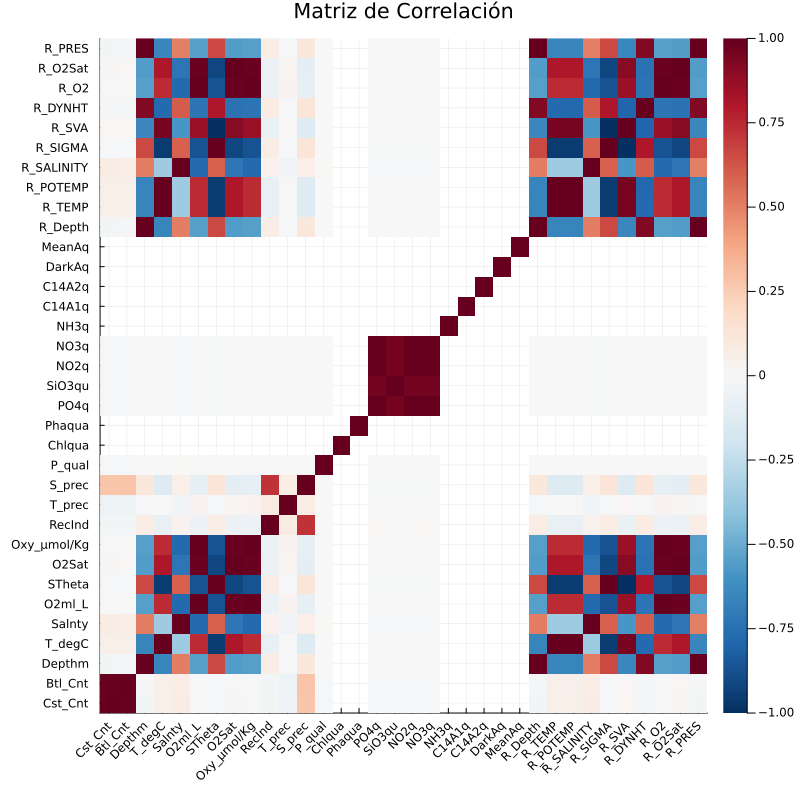

In [23]:
# --- displayCorrelation() ---

# Filtrar filas y columnas con solo missings
valid_rows = any(.!ismissing, cor_matrix, dims=2)[:, 1]
valid_cols = any(.!ismissing, cor_matrix, dims=1)[1, :]
cor_matrix_filtered = cor_matrix[valid_rows, valid_cols]

# Convertir la paleta de ColorSchemes a un array
my_colors = cgrad(:RdBu, rev=true)

# Crear el heatmap con etiquetas ajustadas
heatmap(cor_matrix_filtered,
        xticks=(1:size(cor_matrix_filtered, 2), names(df_numeric[:, valid_cols])),
        yticks=(1:size(cor_matrix_filtered, 1), names(df_numeric[:, valid_cols])),
        title="Matriz de Correlación",
        clim=(-1, 1),
        c=my_colors, 
        xrotation=45, 
        size=(800, 800))  # Ajustar tamaño de la figura

# Cambiar el tamaño de la fuente de las etiquetas
plot!(xtickfont=font(8), ytickfont=font(8))

In [ ]:
#--- Como se observa existe una

#Correlaciones Fuertes Positivas (cercanas a 1):

#   Depthm con R_Depth y R_PRES: Esto es esperable, ya que Depthm, R_Depth y R_PRES representan la profundidad de la muestra, aunque pueden tener ligeras diferencias debido a errores de medición o procesamiento.
#   T_degC con R_TEMP y R_POTEMP: Indica una fuerte relación entre la temperatura medida (T_degC) y las temperaturas reportadas (R_TEMP, R_POTEMP).
#   Salnty con R_SALINITY: La salinidad medida (Salnty) está altamente correlacionada con la salinidad reportada (R_SALINITY).
#    O2ml_L con Oxy_µmol/Kg, R_O2: El oxígeno disuelto en ml/L (O2ml_L) está fuertemente relacionado con el oxígeno en µmol/Kg (Oxy_µmol/Kg) y el oxígeno reportado (R_O2).
#    O2Sat con R_O2Sat: Similar al anterior, la saturación de oxígeno medida (O2Sat) se relaciona con la saturación de oxígeno reportada (R_O2Sat).
#    STheta con R_SIGMA: La densidad potencial (STheta) está altamente correlacionada con la densidad reportada (R_SIGMA).

#Correlaciones Fuertes Negativas (cercanas a -1):

#    Depthm con T_degC: Indica que la temperatura tiende a disminuir a medida que aumenta la profundidad.
#    Depthm con O2ml_L, O2Sat, Oxy_µmol/Kg: El oxígeno disuelto tiende a disminuir con la profundidad.
#    T_degC con STheta, R_SIGMA: La temperatura está inversamente relacionada con la densidad potencial.
#    Salnty con O2ml_L, O2Sat, Oxy_µmol/Kg: La salinidad está inversamente relacionada con el oxígeno disuelto.

In [8]:
# Estadísticas descriptivas antes de eliminar outliers
println("Estadísticas antes de removeOutliersIQR():")
println(describe(df_numeric))

Estadísticas antes de removeOutliersIQR():
34×7 DataFrame
 Row │ variable     mean           min      median      max         nmissing  eltype                  
     │ Symbol       Float64        Real     Float64     Real        Int64     Type                    
─────┼────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Cst_Cnt       17138.8        1        16848.0     34404             0  Int64
   2 │ Btl_Cnt      432432.0        1       432432.0    864863             0  Int64
   3 │ Depthm          226.832      0          125.0      5351             0  Int64
   4 │ T_degC           10.7997     1.44        10.06       31.14      10963  Union{Missing, Float64}
   5 │ Salnty           33.8404    28.431       33.863      37.034     47354  Union{Missing, Float64}
   6 │ O2ml_L            3.39247   -0.01         3.44       11.13     168662  Union{Missing, Float64}
   7 │ STheta           25.8194    20.934       25.996     250.784     5268

In [9]:
# --- removeOutliersIQR() ---
df_numeric = dropmissing(df_numeric)  # Eliminar filas con NaN

for col_name in names(df_numeric)
    q1 = quantile(df_numeric[:, col_name], 0.25)
    q3 = quantile(df_numeric[:, col_name], 0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    filter!(row -> lower_bound <= row[col_name] <= upper_bound, df_numeric)
end

In [10]:
for col_name in names(df_numeric)
    histogram(df_numeric[:, col_name], title="Después de removeOutliersIQR() - $col_name")
end
println("Estadísticas antes de removeOutliersIQR():")
println(describe(df_numeric))

Estadísticas antes de removeOutliersIQR():
34×7 DataFrame
 Row │ variable     mean          min       median      max         nmissing  eltype   
     │ Symbol       Float64       Real      Float64     Real        Int64     DataType 
─────┼─────────────────────────────────────────────────────────────────────────────────
   1 │ Cst_Cnt      9676.34         71       10228.0     22565             0  Int64
   2 │ Btl_Cnt         2.54952e5  2163      266188.0    554794             0  Int64
   3 │ Depthm        163.766         0         125.0       549             0  Int64
   4 │ T_degC         11.358         4.16       10.48       22.68          0  Float64
   5 │ Salnty         33.877        32.599      33.89       35.162         0  Float64
   6 │ O2ml_L          3.35927       0.0         3.4         9.8           0  Float64
   7 │ STheta         25.7683       22.911      25.962      27.184         0  Float64
   8 │ O2Sat          56.2584        0.0        53.4       157.8           0  Floa

In [25]:
# Eliminar filas con valores nulos en columnas específicas
# --- deleteRow(column) ---
#function deleteRow(column::Symbol)
 #   filter!(!ismissing, df[:, column])
#end

# --- filterColumnsByCorrelation(target, threshold, relation) ---
function filterColumnsByCorrelation(df::DataFrame, target::Symbol, threshold::Float64, relation::Function)
    
    # Seleccionar solo las columnas numéricas
    numeric_cols = names(df, findall(eltype.(eachcol(df)) .<: Union{Missing, Number}))
    df_numeric = df[:, numeric_cols]

    # Eliminar filas con missings en la columna objetivo
    df_numeric = dropmissing(df_numeric, target)

    # Calcular la correlación con la columna objetivo
    cor_with_target = cor(df_numeric[:, target], Matrix(df_numeric))

    # Identificar las columnas a eliminar
    cols_to_delete = [col_name for (i, col_name) in enumerate(names(df_numeric)) 
                      if relation(cor_with_target[i], threshold) && col_name != string(target)]

    # Eliminar las columnas del DataFrame original
    select!(df, Not(cols_to_delete))
    return df
end

# --- describe() ---
println("\nEstadísticas descriptivas:")
println(describe(df))


Estadísticas descriptivas:
36×7 DataFrame
 Row │ variable     mean      min                                median    max                                nmissing  eltype                  
     │ Symbol       Union…    Any                                Union…    Any                                Int64     Type                    
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Cst_Cnt      9541.87   71                                 10055.0   33073                                     0  Int64
   2 │ Btl_Cnt      2.5128e5  2161                               261193.0  830773                                    0  Int64
   3 │ Sta_ID                 002.0 065.7                                  176.7 030.0                               0  String15
   4 │ Depth_ID               19-4904CR-HY-087-0606-04400485-0…            20-1207OS-MX-185-1506-09330280-0…         0  String
   5 │ Depthm 

In [26]:
#-- Guardar el DataFrame modificado
CSV.write("bottle_preprocesado.csv", df)

"bottle_preprocesado.csv"